<a href="https://colab.research.google.com/github/JSJeong-me/Python_RPA/blob/main/web/beautifulsoup-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

네이버 지식인 크롤링 :: 제목 여러개 뽑기

여러개의 제목을 가져오기 위해서는 copy selector 기능만으로는

구현하기 힘들다는 것을 어느 정도 느끼셨을 겁니다.

copy selector 기능은 하나 특정한 요소를 찾을 때나, 선택자를 잘 모르겠을 때 사용해 주세요.

원하는 데이터를 제대로 선택하기 위해서는 html 구조를 파악해야 합니다 .

html 구조를 파악하는 방법도 구글 개발자 도구를 이용해 볼거에요.

구글 개발자 도구를 잘 활용하면 내가 얻고자하는 데이터가 어떤 html에 담겨있는지 쉽게 알 수 있습니다!

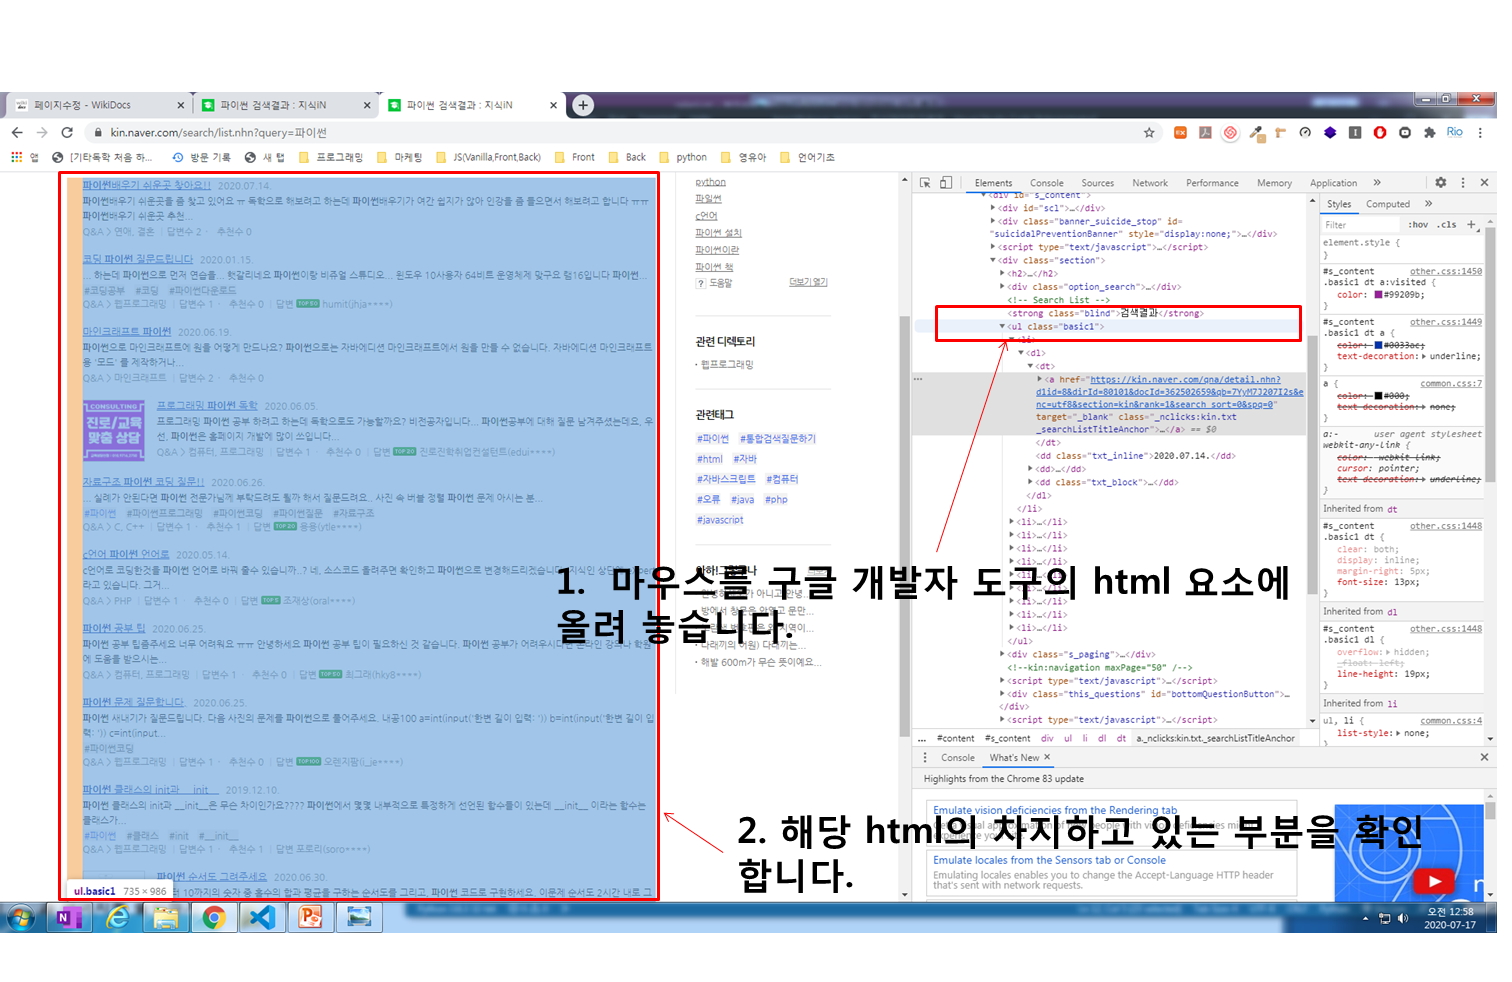

ul class="basic1" 태그에 마우스를 올려 놨을 때 페이지에 표시되는 영역을 보세요.

10개의 지식인 글들이 다 담겨 있지 않나요?

잘 보이면, 마우스로 html을 옮겨 가면서 사이트에 표시되는 영역을 계속 확인해 보세요.

(이 과정은 처음에는 잘 이해가 안될 수 있습니다.)

너무 이해가 안 가고 어려운 분들은, [HTML CSS]를 이용해서 아주 간단한 페이지 몇 개라도 만들어보면 이 과정이 쉽게 이해될 거에요.

ul class="basic1" 태그 안에 지식인 글들이 담겨 있는 걸 확인 했으니 이 태그를 먼저 beautifulsoup 로 추출해봅시다.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://kin.naver.com/search/list.nhn?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.basic1')
    print(ul)
else : 
    print(response.status_code)

select_one의 인자로 직접 css 선택자를 입력해서 뽑아 올 수도 있어요.

(ul 태그중 basic1 클래스를 가진 녀석을 뽑아오는 선택자입니다.)

어때요 ul 태그 내용이 잘 출력 되나요?

다음으로 안에 있는 html 구조를 파악해 볼거에요.

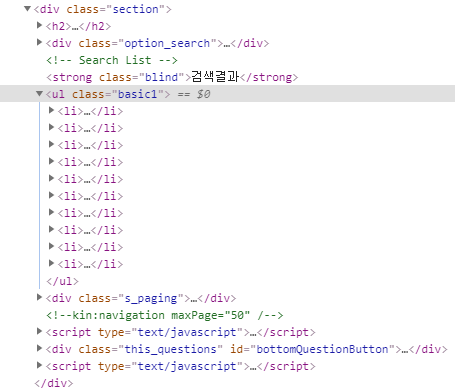

ul 자식태그에는 li태그가 10개 있습니다.

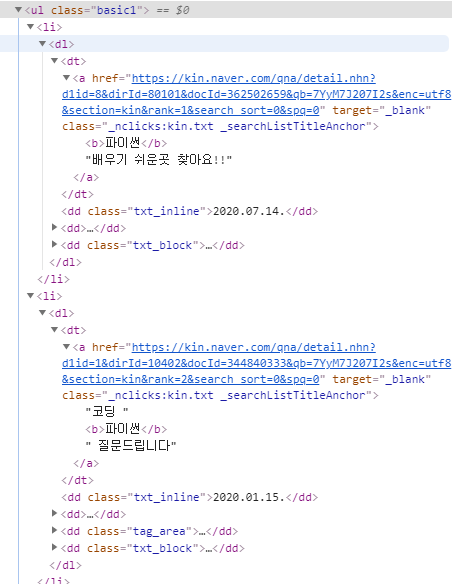

각 li 태그 안에는 dl -> dt -> a 태그 안에 제목이 들어 있습니다.

천천히 어떤게 부모태그이고, 어떤게 자식태그인지 확인해 보세요.

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://kin.naver.com/search/list.nhn?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'

response = requests.get(url)

if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ul = soup.select_one('ul.basic1')
    titles = ul.select('li > dl > dt > a')
    for title in titles:
        print(title.get_text())
else : 
    print(response.status_code)

파이썬 답 알려주세요
파이썬 질문
파이썬 웹 개발
고1 정보 파이썬 질문
파이썬
엑셀vba랑 파이썬 둘중에 어느걸... 
급해요 파이썬 역달팽이 배열
인프런에서 파이썬 배우기
파이썬 10번문제알려주세요
파이썬이란 무엇인가요???


마지막으로 완성된 코드입니다.

select_one 은 찾은 html 중 가장 첫번째 html 을 가져오고

select 는 찾은 모든 html 을 리스트 형태로 반환 합니다.

li > dl > dt > a 는 자식 선택자를 이용한 것 입니다.